# Importing the necessary libraries

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import statistics
import math

# Initial Values Setup for Optimization Problem

This code defines an initial setup for an optimization problem involving multiple constraints and items. The setup includes the following steps:

1. **Initialization**:
   - `N` is the number of items.
   - `M` is the number of constraints (/knapsacks).
   - `v` is an array representing the values of the items.
   - `w` is a 2D array where each row represents the weights of the items under a specific constraint.
   - `c` is an array representing the capacities of the constraints.

2. **Sorting Constraints**:
   - The constraints are sorted based on their capacities in ascending order.

3. **Normalization and Adjustment**:
   - For each item, the average weight across all constraints is computed.
   - Each weight is incremented by 1.

4. **Value-to-Weight Ratio Sorting**:
   - The items are sorted based on their value-to-weight ratio with respect to the first constraint.

The goal of this setup is to prepare the data for an optimization algorithm, ensuring that items and constraints are arranged in a way that facilitates efficient processing.

In [38]:
def initial_values():
   N=30
   M=5
   v=np.array([360, 83, 59, 130, 431, 67, 230, 52, 93, 125,670, 892, 600, 38, 48, 147, 78, 256, 63, 17,120, 164, 432, 35, 92, 110, 22, 42, 50, 323])
   w=np.array([[7,  0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36,  3,  8, 15, 42,  9,  0, 42, 47, 52, 32, 26, 48, 55,  6, 29, 84],
               [8, 66, 98, 50,  0, 30, 0, 88, 15, 37, 26, 72, 61, 57, 17, 27, 83,  3,  9, 66, 97, 42, 2, 44, 71, 11, 25, 74, 90, 20],
               [3, 74, 88, 50, 55, 19, 0,  6, 30, 62, 17, 81, 25, 46, 67, 28, 36,  8,  1, 52, 19, 37, 27, 62, 39, 84, 16, 14, 21, 5],  
               [21, 40, 0,  6, 82, 91, 43, 30, 62, 91, 10, 41, 12,  4, 80, 77, 98, 50, 78, 35, 7,  1, 96, 67, 85,  4, 23, 38,  2, 57],  
               [94, 86, 80, 92, 31, 17, 65, 51, 46, 66, 44,  3, 26,  0, 39, 20, 11,  6, 55, 70, 11, 75, 82, 35, 47, 99, 5, 14, 23, 38]])
   
   c=np.array([400,500,500,600,600])
   
   sort=np.argsort(c)
   w[:][:]=w[sort][::]	
   c=c[sort][::]
   nl=[]
   for i in range(len(v)):
      sum=0
      for j in range(len(w)):
        sum=sum+(w[j][i])
        w[j][i]=w[j][i]+1
      nl.append(sum/len(w))
   sorted_indices= np.argsort(v/w[0][::])
   for i in range(len(w)):
      w[i][:]=w[i][sorted_indices]
   v=v[sorted_indices]

   return N,M,v,w,c

# Functions: `value_generation` and `weight_generation`

These functions are designed to generate populations of individuals with randomly assigned values and weights for an optimization problem. The setup includes the following steps:

1. **Value Generation**:
   - `value_generation(groups, individuals)`: This function generates values for a specified number of groups and individuals.
     - It initializes the necessary parameters by calling the `initial_values` function.
     - It generates a matrix of random values uniformly distributed between 50 and 100 for each individual.
     - The values are rounded to two decimal places.
     - The generated matrix is split into the specified number of groups and returned as a list of numpy arrays.

2. **Weight Generation**:
   - `weight_generation(num)`: This function generates a sorted array of normalized random weights.
     - It generates `num` random values.
     - These values are normalized by dividing by their sum, ensuring they sum to 1.
     - The weights are sorted in descending order.

The goal of these functions is to prepare a population with assigned values and weights, facilitating the setup for optimization algorithms.


In [39]:
def value_generation(groups,individuals):
    N,M,v,w,c=initial_values()
    generated_individuals= np.random.uniform(50, 100, (groups * individuals, N))
    generated_individuals = np.round(generated_individuals, 2)
    population= np.array_split(generated_individuals, groups)
    return(population)

def weight_generation(num):
    w=np.random.random(num)
    return np.sort(w/w.sum())[::-1]

# Function: `random_weighted_integer`

The `random_weighted_integer` function generates a random integer using an exponential distribution, constrained by a specified end value. The function can be used to introduce randomness in the selection process within optimization problems or simulations.

**Parameters**:
- `end`: The maximum value that can be returned.
- `lambda_param`: The rate parameter (λ) for the exponential distribution. Default is 0.19.

**Function Details**:
- The function generates a random value from an exponential distribution using the inverse transform sampling method.
- The resulting value is converted to an integer and constrained to be within the range `[0, end]`.

In [40]:
def random_weighted_integer(end,lambda_param=0.19):
    return min(int(-1 / lambda_param * math.log(1 - random.random())) + 0, end)

# Why do we need to this function?

During the initialization process, we sort the constraints based on their values and subsequently sort the positions of the weights associated with these constraints. Additionally, we sort the items according to their value-to-weight ratio, using the weights associated with the constraint that has the lowest value.

Since we initially generate a population that includes all items, we need a strategy to selectively remove items that have a low value-to-weight ratio. The random_weighted_integer function facilitates this by introducing a bias towards selecting items from the front (which generally have a lower value-to-weight ratio). This bias is implemented using an exponential distribution, which ensures that while items from the front are more likely to be selected, there is still a probabilistic chance to select items from the end. This approach balances exploitation of potentially more valuable items and exploration of the entire item set.

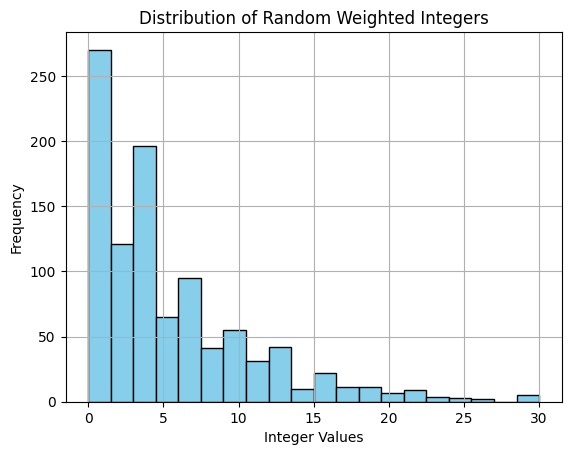

In [41]:
# Number of samples
num_samples = 1000

# Parameters
end_value = 30
lambda_param = 0.175

# Generate random values
values = [random_weighted_integer(end_value, lambda_param) for _ in range(num_samples)]

# Plot histogram
plt.hist(values, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Random Weighted Integers')
plt.xlabel('Integer Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Function: `sum_of_weights`

## Explanation:

This function checks if the total weight of the selected items exceeds the capacity of any knapsack.

- **Parameters**:
  - `l`: A list of item selections, where each element indicates if an item is selected (1) or not (0).
  - `w`: A 2D array where `w[i][j]` represents the weight of the j-th item in the i-th knapsack.
  - `c`: A list of capacities for each knapsack.

- **Logic**:
  - For each knapsack, it calculates the total weight of selected items.
  - If the total weight exceeds the capacity of any knapsack, it returns `True`.
  - If all knapsacks' capacities are respected, it returns `False`.

# Function: `fitness_function`

## Explanation:

This function calculates the fitness of a solution by evaluating the total value of selected items while ensuring the total weight does not exceed the knapsack capacities.

- **Parameters**:
  - `l`: A list of item selections, where each element indicates if an item is selected (a float representing the selection weight) or not (0).
  - `s`: A boolean flag to determine if the function should return the modified list (`True`) or the sum of profits (`False`).

- **Logic**:
  - Initializes the problem parameters using `initial_values()`.
  - Converts the selection list `l` to a binary format `l1`.
  - Calculates the initial total value `sum_of_profits` of the selected items.
  - Iteratively removes items with low value-to-weight ratio until all knapsack constraints are satisfied.
  - If `s` is `True`, returns the modified selection list `l1`.
  - Otherwise, returns the total value of the selected items (`sum_of_profits`).

# Function: `sorting`

## Explanation:

This function sorts the population of solutions based on their fitness and identifies the global best solution.

- **Parameters**:
  - `L`: A list of sublists, where each sublist represents a group of individuals (solutions).

- **Logic**:
  - Initializes variables to track the global best solution (`GL`) and its fitness (`GLr`).
  - For each sublist (group of individuals):
    - Calculates the fitness for each individual.
    - Updates the global best solution if a higher fitness is found.
    - Combines individuals with their fitness scores and sorts them in descending order of fitness.
    - Updates the sublist with the sorted individuals.
  - Returns the sorted population and the global best solution.


In [42]:
def sum_of_weights(l,w,c):
    for i in range(len(w)):
      sum = w[i][:]*l
      sum = np.sum(sum)
      if sum>c[i]:
         return True
    return False

def fitness_function(l,s=False):
    N,M,v,w,c = initial_values()
    l1=[float(round(el/100)) for el in l]
    vl=v*l1
    choice=0
    sum_of_profits=np.sum(vl)
    while sum_of_weights(l1,w,c):
        choice=random_weighted_integer(N-1)
        while (vl[choice]==0):
            choice=random_weighted_integer(N-1)
        sum_of_profits=sum_of_profits-vl[choice]
        l1[choice]= 0
        l[choice] = 49.0
        vl=v*l1

    if s==True:
        return l
    else:
        return sum_of_profits
    
def sorting(L):
    GLr=0
    GL=[]
    for sublist in range(len(L)):
        result=[]
        for element in range(len(L[0])):
            result.append(fitness_function(L[sublist][element]))
            if result[-1]>GLr:
                GLr=result[-1]
                GL=L[sublist][element]
        combined_data = list(zip(L[sublist][::], result))
        sorted_data = sorted(combined_data, key=lambda x: x[1], reverse=True)
        sorted_individuals = [item[0] for item in sorted_data]
        L[sublist]=np.array(sorted_individuals)
    return L,GL

# Function: `update_search`

## Explanation:

This function updates the population of solutions based on certain weighted combinations of the global best solution and other individuals in the population.

- **Parameters**:
  - `population`: A list of solutions where each solution is a list of values.
  - `GL`: The global best solution.

- **Logic**:
  - Create a temporary copy of the population.
  - For each solution in the temporary population:
    - Generate weights (`w1`) and update the first element of the solution using a weighted combination of the global best solution, the second element of the solution, and the mean of the rest of the solution.
    - Generate weights (`w2`) and update the second element of the solution using a weighted combination of the first element of the solution and the mean of the rest of the solution.
    - For the remaining elements of the solution, generate weights (`w3`) and update each element using a weighted combination of the first and second elements of the solution.
  - Update the original population with the modified temporary population.
  - Return the updated population.

# Function: `saturation`

## Explanation:

This function checks if the global best solution has saturated, meaning it has converged to a stable value within a specified tolerance.

- **Parameters**:
  - `GLl`: A list of global best solution values over iterations.
  - `tolerance`: A small value to determine the convergence threshold (default is `1e-6`).

- **Logic**:
  - Calculate the average of all values in `GLl` and check if the absolute difference between this average and the last value in `GLl` is less than the tolerance.
  - Return `True` if the condition is met, indicating saturation; otherwise, return `False`.

# Function: `changeGL`

## Explanation:

This function modifies the global best solution list by replacing certain elements based on a threshold, to avoid premature convergence.

- **Parameters**:
  - `GL`: The global best solution list.
  - `threshold`: A value to determine which elements to replace (default is `50`).
  - `replacement_value`: The value to replace elements with if they are below the threshold (default is `51.0`).
  - `priority_weight`: A factor to help in the selection process (default is `2`).

- **Logic**:
  - Initialize a counter and flags for tracking replacements.
  - Loop until two replacements are made:
    - Randomly select an index ensuring it is different from the previous selection.
    - If the selected element is below the threshold, replace it with the replacement value.
    - Update the counter and flag accordingly.
  - Return the modified global best solution list.


In [43]:
def update_search(population,GL):
    temp=[element.copy() for element in population]

    for i in range(len(temp)):
        w1=weight_generation(3)
        temp[i][0]=GL*w1[0]+population[i][1]*w1[1]+w1[2]*np.mean(population[i][2:],axis=0)
        
        w2=weight_generation(2)
        temp[i][1]=w2[0]*population[i][0]+w2[1]*np.mean(population[i][2:],axis=0)

        for j in range(2,len(temp[0])):
            w3=weight_generation(2)
            temp[i][j]=w3[0]*population[i][0]+w3[1]*population[i][1]
    
    population=[element.copy() for element in temp]
    
    return population

def saturation(GLl, tolerance=1e-6):
    return abs(sum(GLl)/len(GLl) - GLl[-1]) < tolerance

def changeGL(GL, threshold=50, replacement_value=51.0, priority_weight=2):
    count=0
    flag=0
    index=0
    while count<=2:
        while flag==index:
            index=random_weighted_integer(len(GL)-1)
        if GL[index] < threshold:
            GL[index] = replacement_value
            count=count+1
        flag=index
    return GL

In [44]:
def iterations(num,data,updated_population,GL,GLl,l=0):
    GL2=[]
    c=1
    for i in range(l,num):

        updated_population=update_search(updated_population,GL)

        for i in range(len(updated_population)):
            for j in range(len(updated_population[0])):
                updated_population[i][j]=fitness_function(updated_population[i][j],True)

        updated_population,GL=sorting(updated_population)
        GLl.append(fitness_function(GL))
        GL2.append(fitness_function(GL))
        # Flatten the nested list
        flat_list = [item for sublist in updated_population for item in sublist]

        # Storing the results of the objective function
        A = [fitness_function(i) for i in flat_list]
        
        new_data = {'Iteration Number': c, 'Values':flat_list, 'Result': A}
        new_df = pd.DataFrame(new_data)
        
        # Create a DataFrame with iteration number and values
        data = pd.concat([data, new_df], ignore_index=True)
        data
        #print(GL)
        A=fitness_function(GL)
        #print(A)
        GLl.append(A)
        GL2.append(A)
        if i%5==0:
            if saturation(GLl):
                nGL=changeGL(GL)
                run=0
                while fitness_function(nGL)<= fitness_function(GL):
                        nGL=changeGL(GL)
                        run=run+1
                        if run==5:
                            break
                GL=nGL
                GLl=[]
        c=c+1
    return data,updated_population,GL,GLl

# Function: `iterations`

## Explanation:

This function runs multiple iterations to update the population of solutions, evaluate their fitness, and track the global best solution.

- **Parameters**:
  - `num`: The number of iterations to perform.
  - `data`: A DataFrame to store the results of each iteration.
  - `updated_population`: The current population of solutions.
  - `GL`: The global best solution.
  - `GLl`: A list of global best solution values over iterations.
  - `l`: The starting iteration number (default is `0`).

- **Logic**:
  - Initialize an empty list `GL2` to store the global best solution for each iteration and a counter `c`.
  - Loop from the starting iteration number `l` to the total number of iterations `num`:
    - Update the population using the `update_search` function with the current global best solution `GL`.
    - For each solution in the updated population, update its fitness using the `fitness_function`.
    - Sort the updated population based on fitness and update the global best solution using the `sorting` function.
    - Append the fitness of the global best solution to `GLl` and `GL2`.
    - Flatten the updated population into a single list `flat_list`.
    - Evaluate the objective function for each item in the flattened list and store the results in `A`.
    - Create a new DataFrame with iteration number, values, and results, and concatenate it with the existing `data` DataFrame.
    - Every 5 iterations, check if the global best solution has saturated using the `saturation` function. If saturated:
      - Generate a new global best solution `nGL` using the `changeGL` function.
      - Ensure the new global best solution is better than the current one, retrying up to 5 times if necessary.
      - Update the global best solution `GL` and reset `GLl`.
    - Increment the counter `c`.
  - Return the updated `data` DataFrame, the updated population, the global best solution, and the list of global best solution values `GLl`.


In [45]:
population=value_generation(3,5)

updated_population=[element.copy() for element in population]

# Flatten the nested list
flat_list = [item for sublist in population for item in sublist]

for i in range(len(updated_population)):
    for j in range(len(updated_population[0])):
        updated_population[i][j]=fitness_function(updated_population[i][j],True)

flat_list2= [item for sublist in updated_population for item in sublist]

# Storing the results of the objective function
A = [fitness_function(i) for i in flat_list2]

# Create a DataFrame with iteration number and values
#data = pd.DataFrame({'Iteration Number': 0, 'Values':flat_list, 'Result': A})
data = pd.DataFrame({'Iteration Number': 0, 'Values':flat_list, 'Result': A,'Values Used':flat_list2})
data

,Iteration Number,Values,Result,Values Used
0,0,"[74.32, 76.31, 92.19, 69.59, 88.91, 52.92, 79....",2494.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
1,0,"[60.89, 56.43, 97.97, 71.22, 66.53, 57.72, 71....",3498.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
2,0,"[87.98, 80.53, 72.37, 68.07, 53.66, 82.8, 96.6...",2775.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
3,0,"[64.46, 99.55, 67.21, 54.62, 66.06, 88.74, 94....",3650.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
4,0,"[65.55, 60.85, 67.87, 76.93, 58.97, 73.18, 69....",2180.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
5,0,"[80.68, 52.75, 82.59, 70.0, 72.82, 85.68, 94.4...",3248.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
6,0,"[56.47, 57.87, 86.18, 57.27, 93.21, 89.36, 77....",3695.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
7,0,"[91.17, 79.1, 86.02, 86.29, 96.75, 62.39, 92.8...",2352.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
8,0,"[64.56, 57.1, 55.38, 73.47, 60.11, 72.49, 50.2...",2508.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
9,0,"[65.05, 63.54, 56.07, 67.97, 91.32, 64.95, 68....",3089.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."


In [46]:
updated_population,GL=sorting(updated_population)
GLl=[]
GLl.append(fitness_function(GL))
# Flatten the nested list
flat_list = [item for sublist in updated_population for item in sublist]

# Storing the results of the objective function"
A = [fitness_function(i) for i in flat_list]

# Create a DataFrame with iteration number and values
#data = pd.DataFrame({'Iteration Number': 0, 'Values':flat_list, 'Result': A})
data = pd.DataFrame({'Iteration Number': 0, 'Values':flat_list, 'Result': A})
data

,Iteration Number,Values,Result
0,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",3650.0
1,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",3498.0
2,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",2775.0
3,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",2494.0
4,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",2180.0
5,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",3695.0
6,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",3248.0
7,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",3089.0
8,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",2508.0
9,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",2352.0


In [47]:
data,updated_population,GL,GLl=iterations(50,data,updated_population,GL,GLl,l=0)

In [48]:
result = data.loc[data['Iteration Number']<100]
result

,Iteration Number,Values,Result
0,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",3650.0
1,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",3498.0
2,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",2775.0
3,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",2494.0
4,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",2180.0
...,...,...,...
760,50,"[48.999999999999986, 48.999999999999986, 48.99...",4441.0
761,50,"[48.99999999999998, 48.99999999999998, 48.9999...",4441.0
762,50,"[48.999999999999986, 48.999999999999986, 48.99...",4441.0
763,50,"[48.99999999999998, 48.99999999999998, 48.9999...",4441.0


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

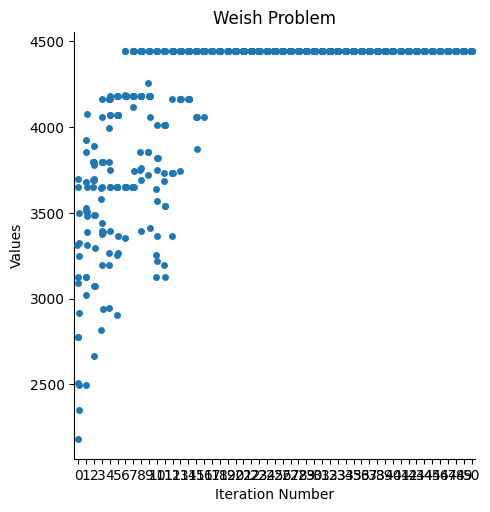

In [49]:
plt.figure(figsize=(10, 6))

data2=data.loc[ data['Iteration Number']<=100]
# Create a categorical plot using catplot with stripplot kind
sns.catplot(data=data2, x='Iteration Number', y='Result', kind='strip', jitter=True)


# Set labels and title
plt.xlabel('Iteration Number')
plt.ylabel('Values')
plt.title('Weish Problem')

# Display the plot
#plt.grid(True)
plt.show

In [50]:
len(GL)

30

In [51]:
def runs(num,iter):
    l=[]

    for i in range(num):
        population=value_generation(3,5)

        updated_population=[element.copy() for element in population]

        for i in range(len(updated_population)):
            for j in range(len(updated_population[0])):
                updated_population[i][j]=fitness_function(updated_population[i][j],True)

        updated_population,GL=sorting(updated_population)
        GLl=[]
        GLl.append(fitness_function(GL))
        # Flatten the nested list
        flat_list = [item for sublist in updated_population for item in sublist]

        # Storing the results of the objective function
        A = [fitness_function(i) for i in flat_list]

        # Create a DataFrame with iteration number and values
        #data = pd.DataFrame({'Iteration Number': 0, 'Values':flat_list, 'Result': A})
        data = pd.DataFrame({'Iteration Number': 0, 'Values':flat_list, 'Result': A})
        data,population,GL,GLl=iterations(iter,data,population,GL,GLl,l=0)
        N,M,V,w,W=initial_values()
        g=fitness_function(GL)
        nl=fitness_function(GL,True)
        nl=[round(element/100) for element in nl]
        sum_of_weights=[]
        for i in range(len(w)):
            sum = w[i][:]*nl
            sum_of_weights.append(np.sum(sum))
        l.append([g,sum_of_weights,nl])
    return l

In [52]:
Result=runs(30,50)

In [53]:
# Using zip and unpacking
list1, list2 ,list3= zip(*Result)

# Converting the result to lists
l = list(list1)
list2 = list(list2)
list3 =list(list3)

print(l)  # Output: ['a', 'd', 'e']
print(list2)  # Output: ['b', 'c', 'f']
print(list3)

[4181.0, 3952.0, 4181.0, 4166.0, 4150.0, 4181.0, 4441.0, 4441.0, 4554.0, 4181.0, 4181.0, 4307.0, 4166.0, 4181.0, 4181.0, 4099.0, 4166.0, 4441.0, 4466.0, 3777.0, 4181.0, 4181.0, 4166.0, 4181.0, 4181.0, 4166.0, 4166.0, 4166.0, 4441.0, 4279.0]
[[298, 352, 383, 597, 594], [256, 431, 455, 587, 586], [298, 352, 383, 597, 594], [292, 360, 449, 599, 578], [333, 310, 371, 565, 523], [298, 352, 383, 597, 594], [373, 363, 387, 576, 577], [373, 363, 387, 576, 577], [395, 347, 385, 547, 599], [298, 352, 383, 597, 594], [298, 352, 383, 597, 594], [342, 393, 381, 523, 558], [292, 360, 449, 599, 578], [298, 352, 383, 597, 594], [298, 352, 383, 597, 594], [303, 407, 440, 553, 591], [292, 360, 449, 599, 578], [373, 363, 387, 576, 577], [379, 371, 349, 579, 521], [218, 434, 408, 555, 561], [298, 352, 383, 597, 594], [298, 352, 383, 597, 594], [292, 360, 449, 599, 578], [298, 352, 383, 597, 594], [298, 352, 383, 597, 594], [292, 360, 449, 599, 578], [292, 360, 449, 599, 578], [292, 360, 449, 599, 578], [3

In [54]:
N,M,v,w,W=initial_values()
print("W = "+ str(W))
print("Values = " + str(l))
print("Run = " + str(len(l)))
print("Average = " + str(sum(l)/len(l)))
print("Maximum = " + str(max(l)))
print("Minimum = "+ str(min(l)))
print("Frequency of Highest = " + str(l.count(max(l))))
print("Frequency of Lowest = " + str(l.count(min(l))))
print("Standard Deviation = " + str(statistics.stdev(l)))
print("Sum of Weights for maximum = " + str(list2[l.index(max(l))]))



count=len(l)
while l.count(min(l))==1:
    if len(l)>count-3:
        print(len(l))
        l.remove(min(l))
        print("After removal of outlier Standard Deviation = " + str(statistics.stdev(l)))
    else:
        break

W = [400 500 500 600 600]
Values = [4181.0, 3952.0, 4181.0, 4166.0, 4150.0, 4181.0, 4441.0, 4441.0, 4554.0, 4181.0, 4181.0, 4307.0, 4166.0, 4181.0, 4181.0, 4099.0, 4166.0, 4441.0, 4466.0, 3777.0, 4181.0, 4181.0, 4166.0, 4181.0, 4181.0, 4166.0, 4166.0, 4166.0, 4441.0, 4279.0]
Run = 30
Average = 4216.7
Maximum = 4554.0
Minimum = 3777.0
Frequency of Highest = 1
Frequency of Lowest = 1
Standard Deviation = 155.68716422187242
Sum of Weights for maximum = [395, 347, 385, 547, 599]
30
After removal of outlier Standard Deviation = 134.01938136434143
29
After removal of outlier Standard Deviation = 124.98791475970322
28
After removal of outlier Standard Deviation = 124.13228170715047
